 # Análise de dados da COVID-19
 Esse notebook foi criado apenas para por em prática o que venho estudando sobre Data Science.
 
 As fontes de dados usadas aqui vem de [Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19)

In [0]:
import pandas as pd
from pandas.testing import assert_frame_equal
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

In [0]:
# data repository
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [0]:
# Agrupa os dados por país e filtra pela última data
def last_date(data):
  return data.groupby("Country/Region").sum().iloc[:,-1]

# Comparação por países destacando o atual epicentro

Text(0.5, 1.0, 'Confirmados por país (amostra de 10 países)')

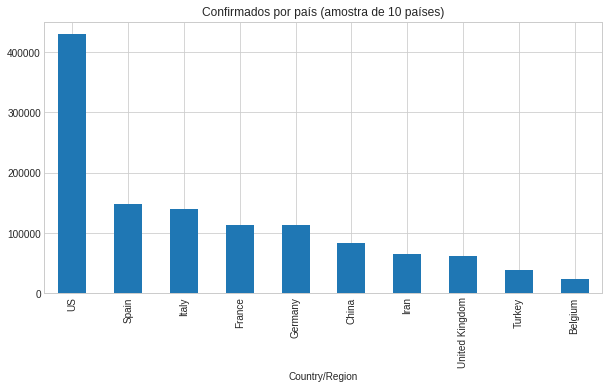

In [49]:
plt.figure(figsize=(10,5))
last_date(confirmed).sort_values(ascending=False)[:10].plot(kind='bar')
plt.title("Confirmados por país (amostra de 10 países)")

# Cumulativo das infecções no Brasil 
Do início da pandemia ao momento atual

Text(0.5, 1.0, 'Casos confirmados no Brasil')

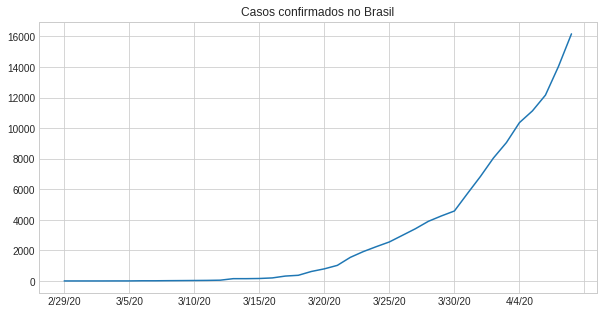

In [50]:
plt.figure(figsize=(10,5))
confirmed_by_country = confirmed.groupby("Country/Region").sum()
confirmed_by_country.loc["Brazil"][40:].plot()
plt.title("Casos confirmados no Brasil")

# Registro de novos casos no Brasil

Text(0.5, 1.0, 'Novos casos no Brasil')

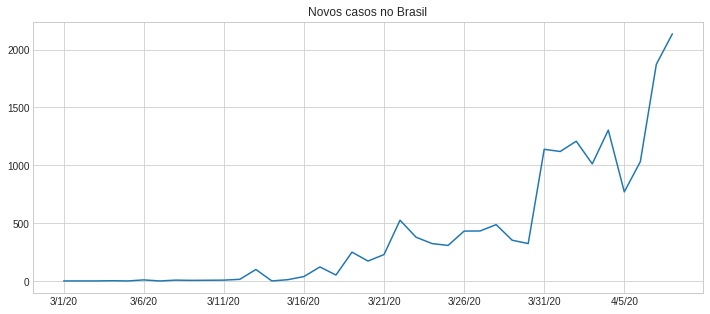

In [51]:
plt.figure(figsize=(12,5))
new_cases = confirmed_by_country.loc["Brazil"][40:].diff().dropna()
new_cases.plot()
plt.title("Novos casos no Brasil")

# Números atualizados no Brasil
Amostra de casos confirmados, mortes e recuperados.

In [52]:
report = [last_date(confirmed), last_date(deaths), last_date(recovered)]
combined = pd.concat(report, axis=1)
combined.columns = ["confirmed", "deaths", "recovered"]
total = pd.DataFrame(combined.loc["Brazil"])
total

,Brazil
confirmed,16170
deaths,819
recovered,127


# Calculando a taxa de letalidade em % no mundo todo

In [53]:
sum_up = combined.sum()
letality_rate = sum_up["deaths"] / sum_up["confirmed"]
print(letality_rate * 100)

5.845924569056796


# Taxa de letalidade em % no Brasil

In [60]:
total = combined.loc["Brazil"]
letality_rate = total["deaths"] / total["confirmed"]
print(letality_rate * 100)

5.0649350649350655


# Letalidade por casos confirmados no mundo todo

Text(0.5, 1.0, 'Letalidade por casos confirmados no mundo')

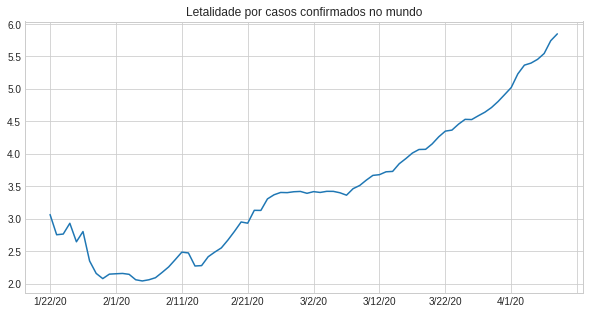

In [57]:
grouped_per_day = pd.DataFrame([confirmed.sum()[3:], recovered.sum()[2:], deaths.sum()[2:]], index=["confirmed", "recovered", "deaths"]).T
grouped_per_day["letality_rate_1"] = grouped_per_day["deaths"] / grouped_per_day["confirmed"] * 100
plt.figure(figsize=(10,5))
grouped_per_day["letality_rate_1"].plot()
plt.title("Letalidade por casos confirmados no mundo")